In [1]:
import os
import torch
import torch.nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn.functional as F 
import torchvision.utils as utils
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
import argparse
import matplotlib.ticker as mtick


## Models from Torchvision

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

# Alexnet

## Loading Alexnet

In [3]:
alexnet = models.alexnet(pretrained =True)

In [4]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Reshaping input image

In [5]:
transform = transforms.Compose([
                 transforms.Resize(256),                    #[2] Resize the image to 256×256 pixels.
                 transforms.CenterCrop(224),                #[3] Crop the image to 224×224 pixels about the center.
                 transforms.ToTensor(),                     #[4] Convert the image to PyTorch Tensor data type.
                 transforms.Normalize(                      #[5] Normalize the image by setting 
                 mean=[0.485, 0.456, 0.406],                #[6] its mean and 
                 std=[0.229, 0.224, 0.225]                  #[7] standard deviation to the specified values.
                 )])

## Class database

In [6]:
with open('class_names_ImageNet.txt') as labels:
    classes = [i.strip() for i in labels.readlines()]

print("\nprint the first 5 classes to see the lables")
for i in range(5):
    print("class " + str(i) + ": " + str(classes[i]))


print the first 5 classes to see the lables
class 0: tench, Tinca tinca
class 1: goldfish, Carassius auratus
class 2: great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
class 3: tiger shark, Galeocerdo cuvieri
class 4: hammerhead, hammerhead shark


## Model Inference

In [7]:
image_file = "apple.jpg"
img = Image.open(image_file)
transformed_img = transform(img)
batch_img = torch.unsqueeze(transformed_img, 0)

output = alexnet(batch_img)
print(output.shape)

torch.Size([1, 1000])


## Labelling with class

In [8]:
_, indices = torch.sort(output, descending=True)
percentage = F.softmax(output, dim=1)[0] * 100.0
results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
print("The first 5 classes the testing image belongs to")
for i in range(5):
    print('{}: {:.4f}%'.format(results[i][0], results[i][1]))

The first 5 classes the testing image belongs to
pomegranate: 54.2108%
hip, rose hip, rosehip: 18.1776%
bell pepper: 6.3239%
rubber eraser, rubber, pencil eraser: 6.1089%
fig: 4.5910%


## `function()` Prediction

In [9]:
def Predict_AlexNet(img):
    transformed_img = transform(img)
    batch_img = torch.unsqueeze(transformed_img, 0)

    output = alexnet(batch_img)

    _, indices = torch.sort(output, descending=True)
    percentage = F.softmax(output, dim=1)[0] * 100.0

    Class, Percent = [],[]
    for i in indices[0][:5]:
        Class.append(classes[i])
        Percent.append(percentage[i].item())

    
    results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
    print("The first 5 classes the testing image belongs to")
    for i in range(5):
        print('{}: {:.4f}%'.format(results[i][0], results[i][1]))
    return Class, Percent

# Predict_AlexNet(Image.open("apple.jpg"))

In [10]:
Predict_AlexNet(Image.open("apple.jpg"))

The first 5 classes the testing image belongs to
pomegranate: 54.2108%
hip, rose hip, rosehip: 18.1776%
bell pepper: 6.3239%
rubber eraser, rubber, pencil eraser: 6.1089%
fig: 4.5910%


(['pomegranate',
  'hip, rose hip, rosehip',
  'bell pepper',
  'rubber eraser, rubber, pencil eraser',
  'fig'],
 [54.21076965332031,
  18.177600860595703,
  6.323949337005615,
  6.108933448791504,
  4.591032028198242])

## Live-feed Camera Prediction

In [11]:
def Live_Predict(Class, Percent, image):
    fig, ax = plt.subplots(1,2, figsize = (8,3), dpi = 150)

    ax[0].set_title("Web Cam Capture")
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_xlabel(Class[0])



    for i in range(5):
        ax[1].barh(i,Percent[i], color = plt.cm.plasma_r(i/7))
        ax[1].text(0.2, i+0.43, Class[i] , color = plt.cm.inferno_r(i/10+0.4), fontsize = 5)
        ax[1].text(0.2, i-0.1, str(round(Percent[i], 2)) + "%: " + Class[i][:20] + "...", color = 'k', fontsize = 10 - i)

    ax[1].set_yticks([])
    ax[1].set_title("Classification")
    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    xticks = mtick.FormatStrFormatter(fmt)
    ax[1].xaxis.set_major_formatter(xticks)
    # ax[1].set_ylim(0, Percent)

    plt.tight_layout()
    plt.show()

The first 5 classes the testing image belongs to
coffee mug: 31.7617%
cup: 22.7312%
pitcher, ewer: 19.9558%
water jug: 7.7095%
teapot: 6.3103%


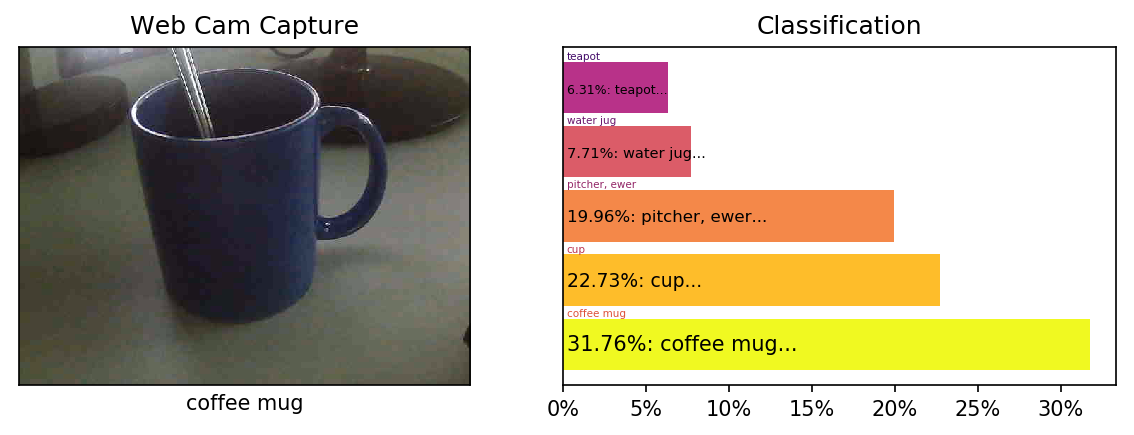

In [253]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
Class, Percent = Predict_AlexNet(img)
Live_Predict(Class, Percent, image)

The first 5 classes the testing image belongs to
computer keyboard, keypad: 29.3941%
space bar: 26.3317%
mouse, computer mouse: 15.6302%
typewriter keyboard: 9.1439%
hand-held computer, hand-held microcomputer: 4.3161%


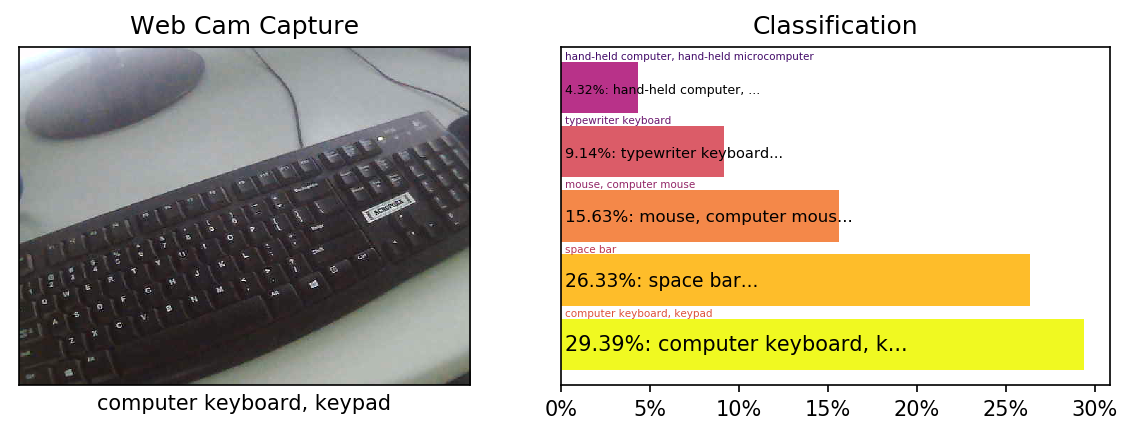

In [309]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
Class, Percent = Predict_AlexNet(img)
Live_Predict(Class, Percent, image)

The first 5 classes the testing image belongs to
monitor: 13.2177%
laptop, laptop computer: 13.1010%
notebook, notebook computer: 8.7278%
envelope: 7.0628%
binder, ring-binder: 5.3885%


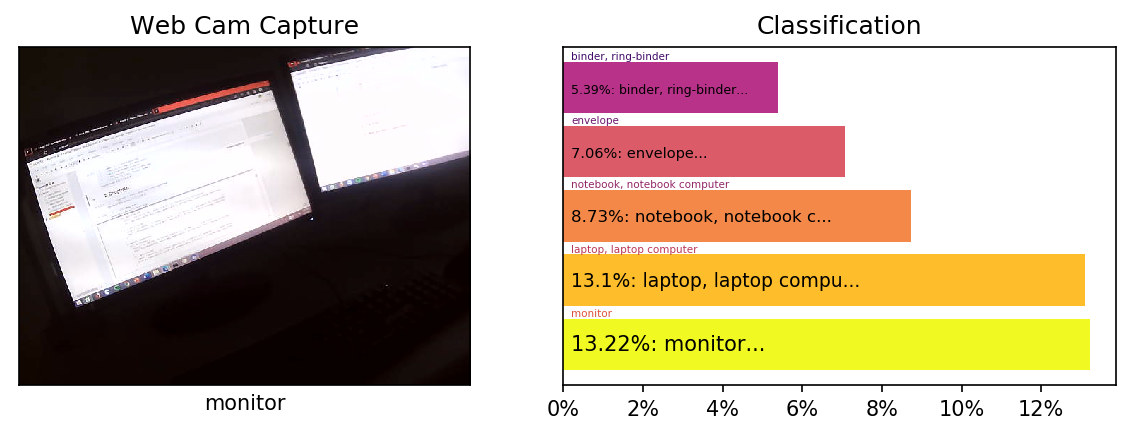

In [312]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
Class, Percent = Predict_AlexNet(img)
Live_Predict(Class, Percent, image)

The first 5 classes the testing image belongs to
cellular telephone, cellular phone, cellphone, cell, mobile phone: 29.2716%
hard disc, hard disk, fixed disk: 19.5045%
iPod: 18.2706%
hand-held computer, hand-held microcomputer: 16.0651%
remote control, remote: 9.7490%


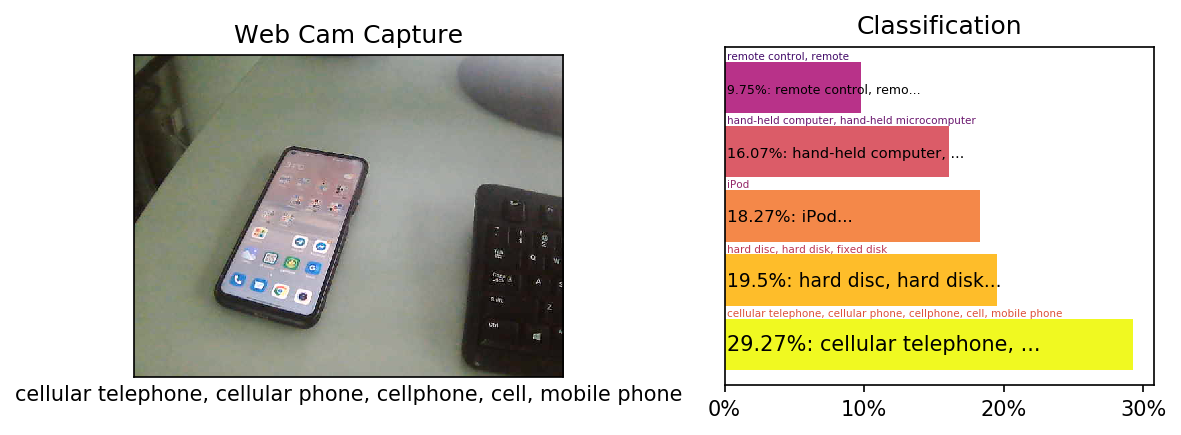

In [325]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
Class, Percent = Predict_AlexNet(img)
Live_Predict(Class, Percent, image)

The first 5 classes the testing image belongs to
bannister, banister, balustrade, balusters, handrail: 11.2386%
bullet train, bullet: 9.0467%
projectile, missile: 6.9017%
missile: 5.4499%
planetarium: 5.1510%


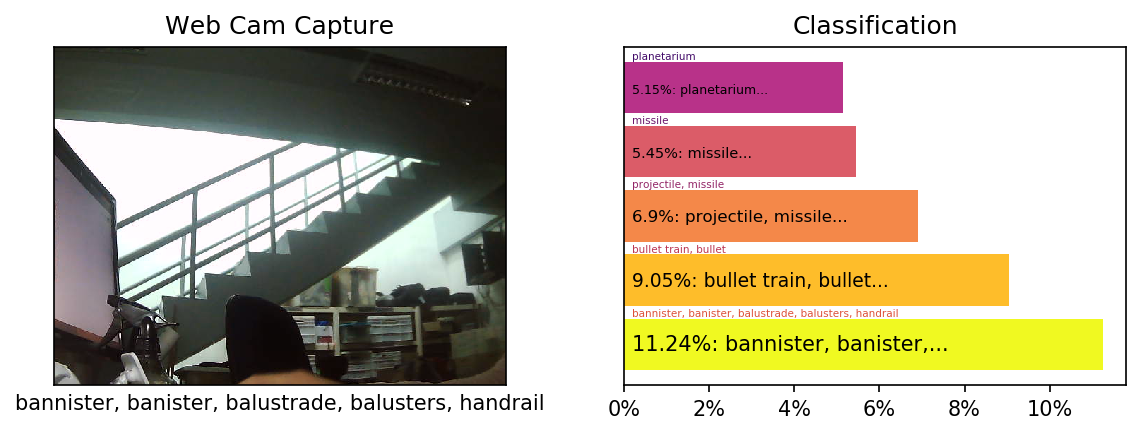

In [29]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
Class, Percent = Predict_AlexNet(img)
Live_Predict(Class, Percent, image)

The first 5 classes the testing image belongs to
white wolf, Arctic wolf, Canis lupus tundrarum: 39.6209%
kuvasz: 11.4493%
African grey, African gray, Psittacus erithacus: 10.9164%
Bedlington terrier: 7.8771%
llama: 5.0500%


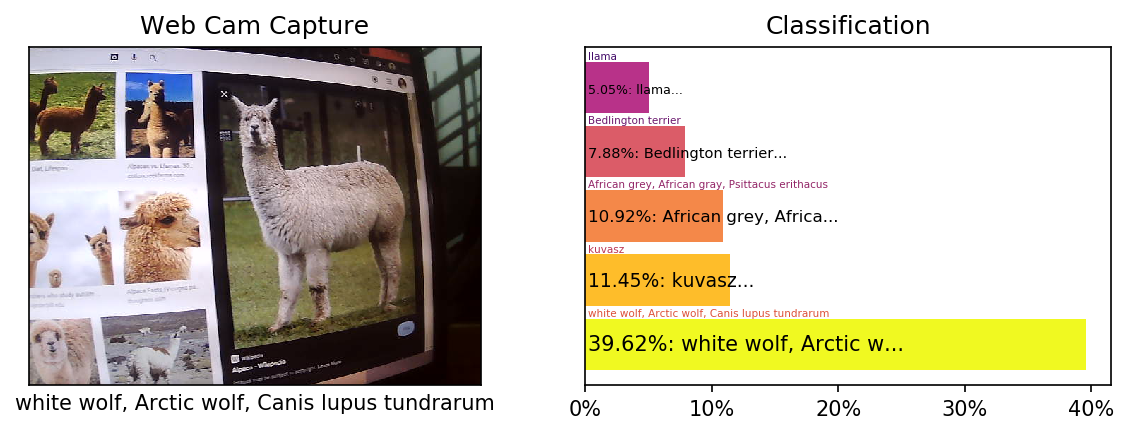

In [31]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
Class, Percent = Predict_AlexNet(img)
Live_Predict(Class, Percent, image)

The first 5 classes the testing image belongs to
ski mask: 36.1310%
mask: 13.3131%
bathing cap, swimming cap: 12.0854%
abaya: 6.3881%
gasmask, respirator, gas helmet: 5.7004%


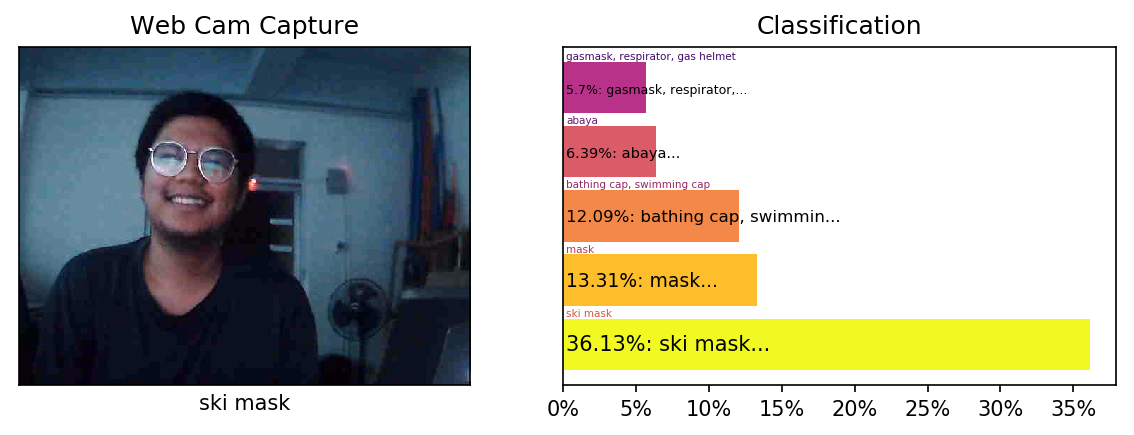

In [13]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
Class, Percent = Predict_AlexNet(img)
Live_Predict(Class, Percent, image)

# MobileNetV2

In [19]:
mobilenetv2 = models.mobilenet_v2(pretrained=True)
print(mobilenetv2)

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [71]:
# transformed_img = transform(Image.open("apple.jpg"))
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
transformed_img = transform(img)

batch_img = transformed_img.unsqueeze(0)
output = mobilenetv2(batch_img)

In [72]:
_, indices = torch.sort(output, descending=True)
percentage = F.softmax(output, dim=1)[0] * 100.0
results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
print("The first 5 classes the testing image belongs to")
for i in range(5):
    print('{}: {:.4f}%'.format(results[i][0], results[i][1]))

The first 5 classes the testing image belongs to
drum, membranophone, tympan: 1.1766%
Chihuahua: 0.8800%
caldron, cauldron: 0.8085%
soccer ball: 0.7922%
sunglass: 0.6995%


In [73]:
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(classes[top5_catid[i]], top5_prob[i].item())

paper towel 0.013035088777542114
bucket, pail 0.01043704990297556
television, television system 0.010054738260805607
lighter, light, igniter, ignitor 0.00893570575863123
tub, vat 0.00862975139170885


# GoogleNet

In [257]:
googlenet = models.googlenet(pretrained=True)

In [258]:
print(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [302]:
transformed_img = transform(Image.open("apple.jpg"))
batch_img = transformed_img.unsqueeze(0)
output = googlenet(batch_img)
# print(output[0])

# _, indices = torch.sort(output, descending=True)
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)

for i in range(top5_prob.size(0)):
    print(classes[top5_catid[i]], top5_prob[i].item())
# Class, Percent = [],[]
# for i in indices[0][:5]:
#     Class.append(classes[i])
#     Percent.append(percentage[i].item())


# results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
# print("The first 5 classes the testing image belongs to")
# for i in range(5):
#     print('{}: {:.4f}%'.format(results[i][0], results[i][1]))

spatula 0.0031076890882104635
scale, weighing machine 0.0030816332437098026
ping-pong ball 0.003059242619201541
tray 0.0027458250988274813
cup 0.00272711762227118


In [291]:
percentage[:10]

tensor([0.0005, 0.0004, 0.0004, 0.0006, 0.0006, 0.0010, 0.0007, 0.0012, 0.0017,
        0.0010], grad_fn=<SliceBackward0>)

In [279]:
def Predict_GoogleNet(img):
    transformed_img = transform(img)
    batch_img = torch.unsqueeze(transformed_img, 0)

    output = googlenet(batch_img)

    _, indices = torch.sort(output, descending=True)
    percentage = F.softmax(output, dim=1)[0] * 100.0

    Class, Percent = [],[]
    for i in indices[0][:5]:
        Class.append(classes[i])
        Percent.append(percentage[i].item())

    
    results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
    print("The first 5 classes the testing image belongs to")
    for i in range(5):
        print('{}: {:.4f}%'.format(results[i][0], results[i][1]))
    return Class, Percent

Predict_GoogleNet(Image.open("apple.jpg"))

The first 5 classes the testing image belongs to
snail: 0.2762%
torch: 0.2747%
sewing machine: 0.2361%
tusker: 0.2284%
honeycomb: 0.2249%


(['snail', 'torch', 'sewing machine', 'tusker', 'honeycomb'],
 [0.27615511417388916,
  0.2746683657169342,
  0.23609544336795807,
  0.22844837605953217,
  0.2248927503824234])

In [270]:
Predict_GoogleNet(Image.open("apple.jpg"))

The first 5 classes the testing image belongs to
chain: 0.3106%
hook, claw: 0.3092%
ladle: 0.2961%
pole: 0.2666%
doormat, welcome mat: 0.2607%


(['chain', 'hook, claw', 'ladle', 'pole', 'doormat, welcome mat'],
 [0.31056666374206543,
  0.30918949842453003,
  0.29608026146888733,
  0.2666129171848297,
  0.26070675253868103])

In [271]:
Predict_AlexNet(Image.open("apple.jpg"))

The first 5 classes the testing image belongs to
pomegranate: 54.2108%
hip, rose hip, rosehip: 18.1776%
bell pepper: 6.3239%
rubber eraser, rubber, pencil eraser: 6.1089%
fig: 4.5910%


(['pomegranate',
  'hip, rose hip, rosehip',
  'bell pepper',
  'rubber eraser, rubber, pencil eraser',
  'fig'],
 [54.21076965332031,
  18.177600860595703,
  6.323949337005615,
  6.108933448791504,
  4.591032028198242])

In [ ]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
Class, Percent = Predict_AlexNet(img)
Live_Predict(Class, Percent, image)

The first 5 classes the testing image belongs to
coffeepot: 23.9709%
teapot: 18.2654%
pitcher, ewer: 15.6754%
water jug: 13.9115%
coffee mug: 8.8310%


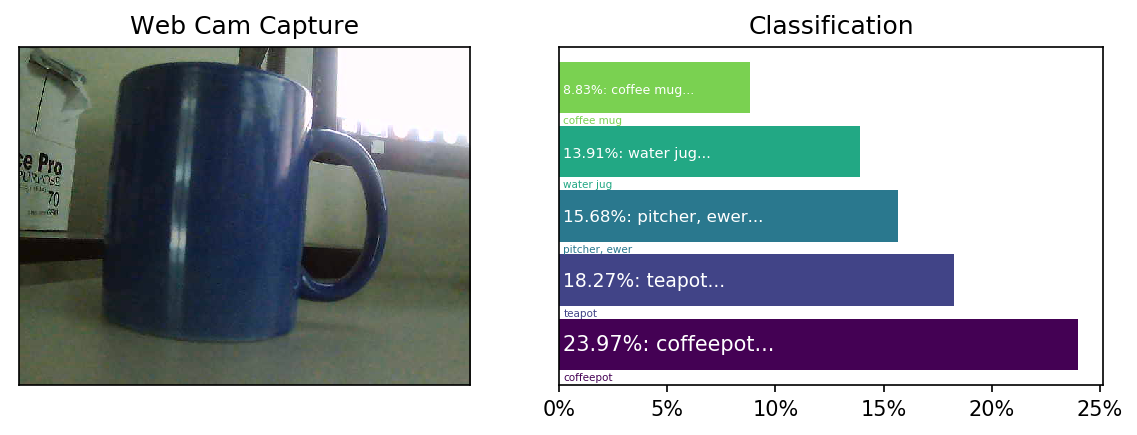

In [160]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
img = Image.fromarray(image)
Class, Percent = Predict_AlexNet(img)

fig, ax = plt.subplots(1,2, figsize = (8,3), dpi = 150)

ax[0].set_title("Web Cam Capture")
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_xticks([])
ax[0].set_yticks([])


for i in range(5):
    ax[1].barh(i,Percent[i], color = plt.cm.viridis(i/5))
    ax[1].text(0.2, i-0.57, Class[i] , color = plt.cm.viridis(i/5), fontsize = 5)
    ax[1].text(0.2, i-0.1, str(round(Percent[i], 2)) + "%: " + Class[i][:20] + "...", color = 'w', fontsize = 10 - i)

ax[1].set_yticks([])
ax[1].set_title("Classification")
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax[1].xaxis.set_major_formatter(xticks)
# ax[1].set_ylim(0, Percent)

plt.tight_layout()


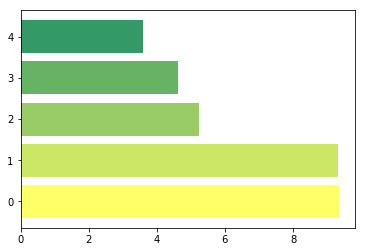

In [49]:
for i in range(5):
    plt.barh(i,Percent[i], color = plt.cm.summer_r(i/5))


In [3]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)
        plt.draw()

        try:    # Avoids a NotImplementedError caused by `plt.pause`
            plt.pause(0.05)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-czu11tvl\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# image = plt.imread(str(image_file))

# # plt.figure(dpi = 200)
# plt.subplot(121)
# plt.imshow(image)


In [17]:
def visualize_activation_maps(input, model):
    I = utils.make_grid(input, nrow=1, normalize=True, scale_each=True)
    img = I.permute((1, 2, 0)).cpu().numpy()

    conv_results = []
    x = input
    for idx, operation in enumerate(model.features):
        x = operation(x)
        if idx in {1, 4, 7, 9, 11}:
            conv_results.append(x)
    
    for i in range(5):
        conv_result = conv_results[i]
        N, C, H, W = conv_result.size()

        mean_acti_map = torch.mean(conv_result, 1, True)
        mean_acti_map = F.interpolate(mean_acti_map, size=[224,224], mode='bilinear', align_corners=False)

        map_grid = utils.make_grid(mean_acti_map, nrow=1, normalize=True, scale_each=True)
        map_grid = map_grid.permute((1, 2, 0)).mul(255).byte().cpu().numpy()
        map_grid = cv2.applyColorMap(map_grid, cv2.COLORMAP_JET)
        map_grid = cv2.cvtColor(map_grid, cv2.COLOR_BGR2RGB)
        map_grid = np.float32(map_grid) / 255

        visual_acti_map = 0.6 * img + 0.4 * map_grid
        tensor_visual_acti_map = torch.from_numpy(visual_acti_map).permute(2, 0, 1)

        file_name_visual_acti_map = 'conv{}_activation_map.jpg'.format(i+1)
        utils.save_image(tensor_visual_acti_map, file_name_visual_acti_map)

    return 0


visualize_activation_maps(batch_img, alexnet)



0


print the first 5 classes to see the lables
class 0: tench, Tinca tinca
class 1: goldfish, Carassius auratus
class 2: great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
class 3: tiger shark, Galeocerdo cuvieri
class 4: hammerhead, hammerhead shark


In [16]:
sorted, indices = torch.sort(output, descending=True)
percentage = F.softmax(output, dim=1)[0] * 100.0
results = [(classes[i], percentage[i].item()) for i in indices[0][:5]]
print("\nprint the first 5 classes the testing image belongs to")
for i in range(5):
    print('{}: {:.4f}%'.format(results[i][0], results[i][1]))





print the first 5 classes the testing image belongs to
hip, rose hip, rosehip: 54.2499%
pomegranate: 35.2074%
fig: 1.8170%
lemon: 1.8012%
orange: 0.7961%


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [3]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

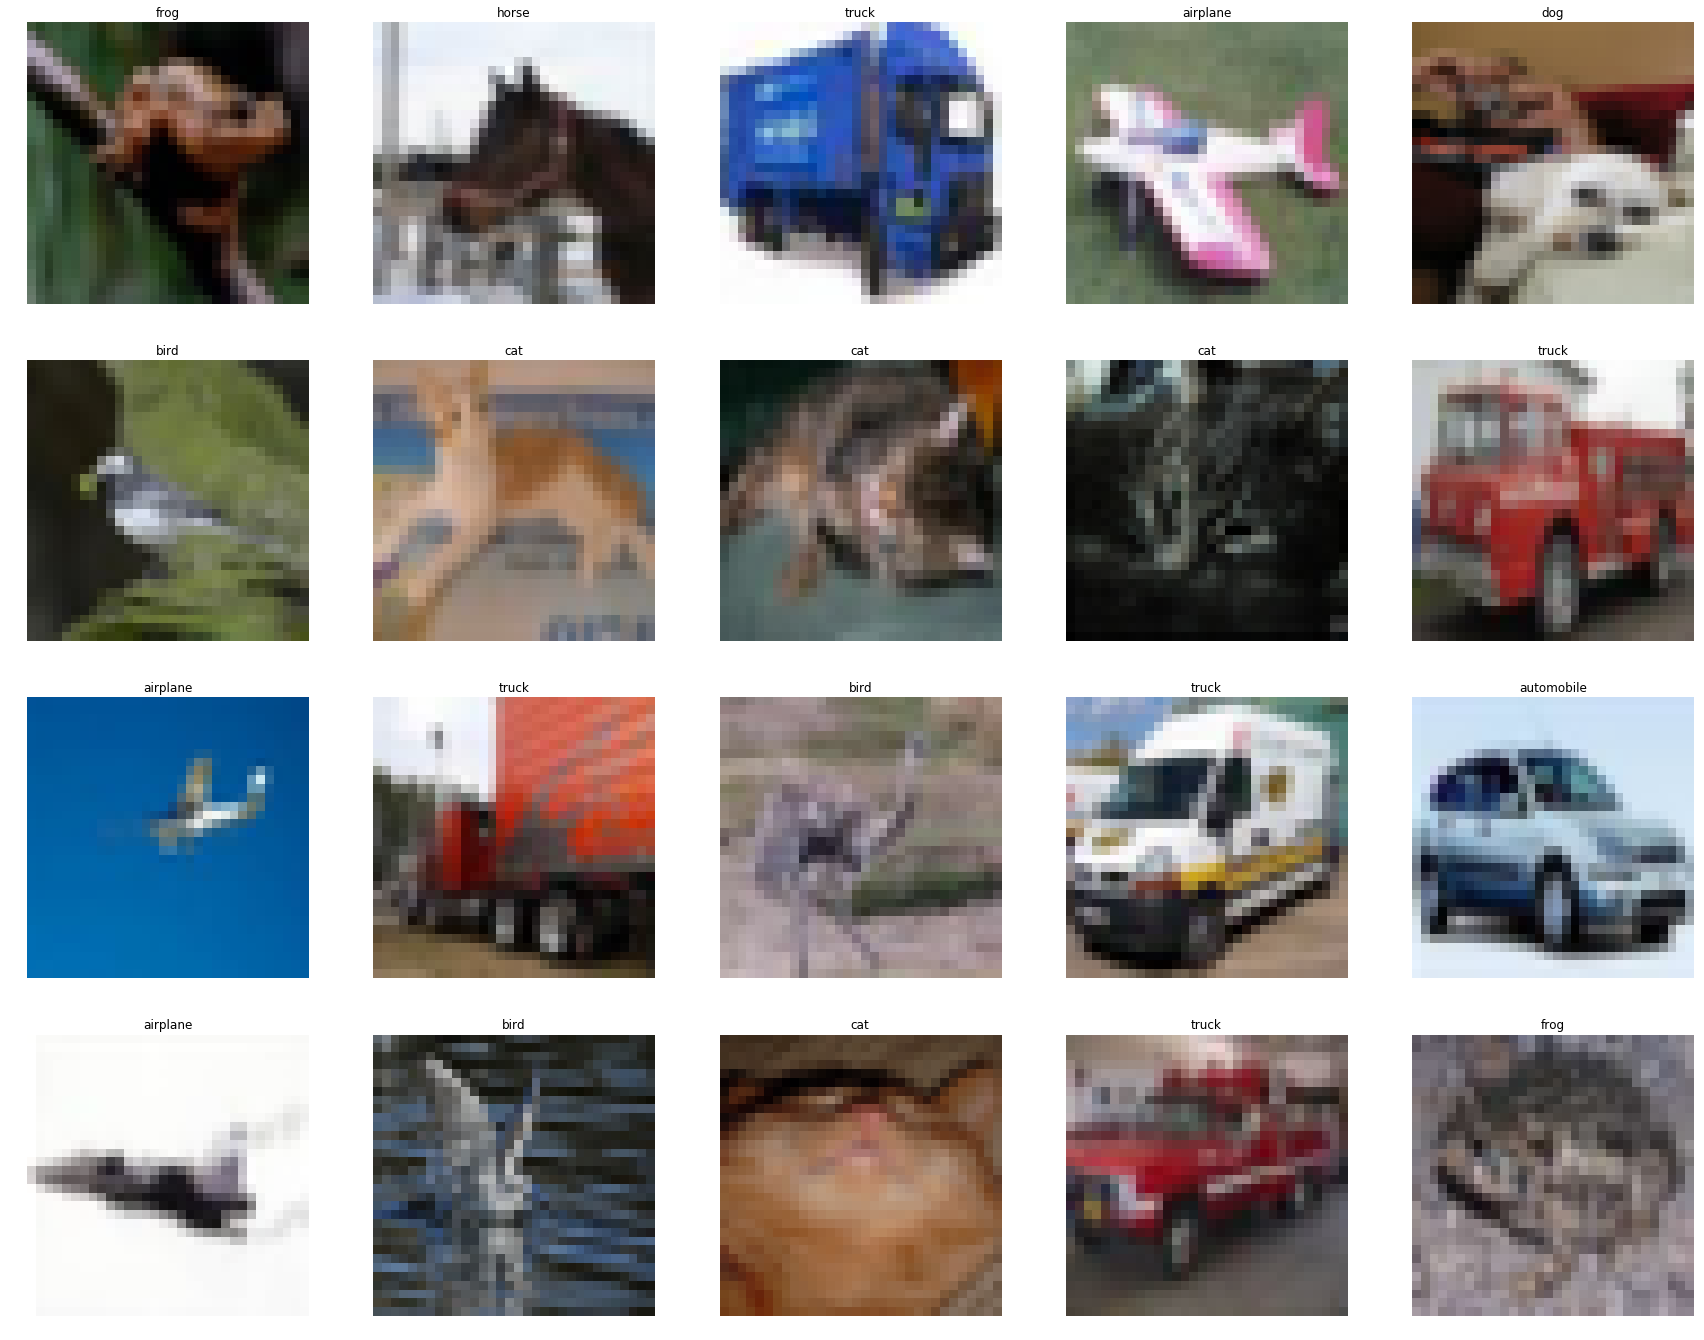

In [11]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

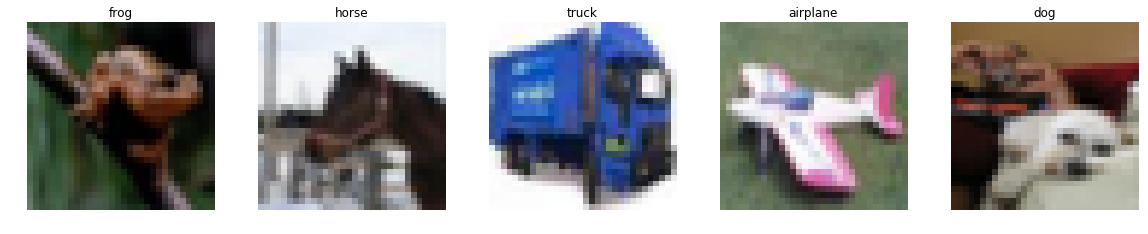

In [6]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [7]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

In [10]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

AttributeError: module 'tensorflow.tools.api.generator.api.data' has no attribute 'experimental'

In [12]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

AttributeError: module 'tensorflow.tools.api.generator.api.data' has no attribute 'experimental'

In [9]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

AttributeError: module 'tensorflow.tools.api.generator.api.image' has no attribute 'resize'

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])